### Pre-trained models

In [1]:
import tensorflow.keras as keras
from matplotlib import pyplot as plt
import numpy as np


## Load in the pretrained model


In [1]:
from tensorflow.keras.applications import vgg16, mobilenet_v2, xception

In [3]:
model = vgg16.VGG16()

In [4]:
model.summary() #16 layers
                #138 million parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

1. Input layer --> has nothing to learn. Thus number of parameters = 0

**First convolutional layer** 

64 filters with size 3x3, with 3 channels each. In addition you have 64 biases. 

Parameters related to the old layer:

$$p_{old} = f_{width} *f_{height} * nr_{f}$$

The parameters resulting in the new layer:

$$p_{new} = f_{new}*p_{old}+bias_{new}$$


In [5]:
  64*(3*3*3) + 64

1792

**Second Conv2D**

The convolutional layer already learned 64 filters. So the number of trainable parameters in this 
is:

In [7]:
p_old = 3*3*64
p_old

576

In [8]:
p_new = 64 * p_old + 64
p_new

36928

**Third Conv2d**

In [9]:
p_olds = 3 * 3 * 64

In [10]:
p_news = 128 * p_olds + 128
p_news

73856

### Load an image

- The image must be 224 x 224 RGB since this is what the vgg input layer requires. 

In [30]:
img = keras.preprocessing.image.load_img('trilobite.jpg', target_size=(224, 224))
img = np.array(img)
img.shape

(224, 224, 3)

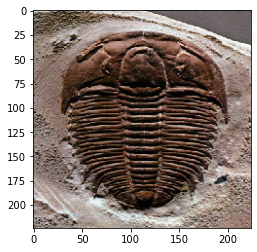

In [31]:
plt.imshow(img)

In [32]:
# number of observation, width, height, color channel
img = img.reshape((1, 224, 224, 3))

### Apply preprocessing


    The only preprocessing we do is subtracting the mean RGB value, computed on the  training set, from each pixel.

In [33]:
processed_img = vgg16.preprocess_input(img)
processed_img

array([[[[  73.061    ,   74.221    ,   56.32     ],
         [  95.061    ,   96.221    ,   78.32     ],
         [  96.061    ,   94.221    ,   77.32     ],
         ...,
         [  -5.939003 ,  -19.779    ,  -16.68     ],
         [  -2.939003 ,  -16.779    ,  -13.68     ],
         [  -0.939003 ,  -14.778999 ,  -11.68     ]],

        [[  95.061    ,   93.221    ,   84.32     ],
         [  97.061    ,   95.221    ,   86.32     ],
         [  90.061    ,   88.221    ,   79.32     ],
         ...,
         [  -3.939003 ,  -17.779    ,  -14.68     ],
         [  -8.939003 ,  -22.779    ,  -19.68     ],
         [ -11.939003 ,  -25.779    ,  -22.68     ]],

        [[ 107.061    ,  100.221    ,  106.32     ],
         [  68.061    ,   63.221    ,   69.32     ],
         [  21.060997 ,   16.221    ,   22.32     ],
         ...,
         [  -9.939003 ,  -23.779    ,  -20.68     ],
         [  -6.939003 ,  -20.779    ,  -17.68     ],
         [ -12.939003 ,  -26.779    ,  -23.68     ]],

### Make a prediction


In [34]:
y_pred = model.predict(processed_img)


- Keras provides a function to interpret the probabilities called decode_predictions().

- It returns a list of classes and their probabilities. 

### Decode the prediction

In [35]:
vgg16.decode_predictions(y_pred, top=10)

[[('n01768244', 'trilobite', 0.99997556),
  ('n01955084', 'chiton', 2.4379995e-05),
  ('n01990800', 'isopod', 9.700323e-09),
  ('n01910747', 'jellyfish', 2.4949803e-10),
  ('n01665541', 'leatherback_turtle', 5.99417e-11),
  ('n01943899', 'conch', 2.995089e-11),
  ('n07860988', 'dough', 1.871885e-11),
  ('n04153751', 'screw', 1.7874943e-11),
  ('n02892201', 'brass', 1.7041627e-11),
  ('n02321529', 'sea_cucumber', 1.58843e-11)]]

### Let's have a look at the output of a intermediate convolution layer

In [36]:
[layer.name for layer in model.layers]

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool',
 'flatten',
 'fc1',
 'fc2',
 'predictions']

In [37]:
layer_name = model.layers[8]._name

In [38]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [39]:
layer_name


'block3_conv2'

In [40]:
# extract a layer
layer = model.get_layer('block4_conv3')
layer

In [41]:
layer_output=model.get_layer(layer_name).output

In [43]:
#define a new helper model
intermediate_layer_model = keras.models.Model(inputs=model.input,
                                 outputs=layer_output)

In [44]:
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [45]:
#predict the feature map
conv_layer = intermediate_layer_model.predict(processed_img)

In [46]:
conv_layer.shape

(1, 56, 56, 256)

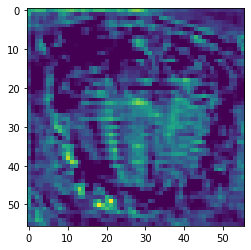

In [47]:
plt.imshow(conv_layer[0,:,:,2])

- Articles: https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d
- Satellite images:
https://www.vortexa.com/insight/satellite-images-object-detection-part-2